✅ Dataset loaded successfully!
   Age  Gender        BMI  BloodPressure  Glucose  Cholesterol  LiverEnzyme  \
0   58  Female  37.350801            105      233          225    98.168710   
1   71    Male  37.152725             91      168          237    95.899576   
2   48    Male  23.253517            149      150          274    67.864487   
3   34    Male  27.927266            143       71          174    24.466122   
4   62    Male  39.669772            119      146          113    50.955930   

   Creatinine  Hemoglobin  OxygenLevel        CRP  Smoking  Alcohol  \
0    1.920708   12.740709    92.814768   7.458132        0        1   
1    1.733757    8.863602    95.805720  12.553377        1        0   
2    3.289826   11.618076    95.528664   9.853564        1        0   
3    1.530595   16.615852    91.764165   2.942283        0        0   
4    3.390453   16.959933    92.834185   1.205318        1        0   

   ExercisePerWeek  FamilyHistory         Disease  
0              

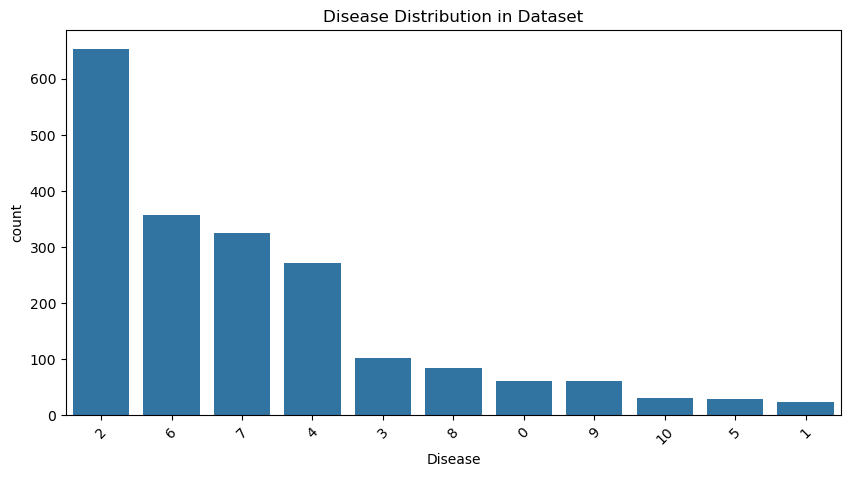


✅ Model and encoders saved successfully!


In [1]:
# ============================================
# Multi-Disease Prediction Model - Training
# ============================================

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

# --------------------------
# 1. Load dataset
# --------------------------
df = pd.read_csv("data/synthetic_data.csv")

print("✅ Dataset loaded successfully!")
print(df.head())
print("\nColumns:", df.columns.tolist())
print("\nDiseases present:", df["Disease"].unique())

# --------------------------
# 2. Encode categorical data
# --------------------------
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])  # Male=1, Female=0

le_disease = LabelEncoder()
df["Disease"] = le_disease.fit_transform(df["Disease"])  # map disease names to numbers

# --------------------------
# 3. Split features and target
# --------------------------
X = df.drop("Disease", axis=1)
y = df["Disease"]

# Normalize numeric features for better performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --------------------------
# 4. Train-test split
# --------------------------
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# --------------------------
# 5. Train model
# --------------------------
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

# --------------------------
# 6. Evaluate model
# --------------------------
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"\n🎯 Accuracy: {acc:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_disease.classes_))

# Optional: visualize class distribution
plt.figure(figsize=(10,5))
sns.countplot(x=df["Disease"], order=df["Disease"].value_counts().index)
plt.title("Disease Distribution in Dataset")
plt.xticks(rotation=45)
plt.show()

# --------------------------
# 7. Save model and encoders
# --------------------------
joblib.dump(model, "multi_disease_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le_disease, "label_encoder.pkl")
joblib.dump(le_gender, "gender_encoder.pkl")

print("\n✅ Model and encoders saved successfully!")